<a href="https://colab.research.google.com/github/RamcharanChandragiri/MACHINE-LEARNING/blob/main/ML_Lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

L1 Regularization -Lasso: Implementing Lasso Regression using libraries and
comparing results with Linear Regression.
Kaggle Dataset Link: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques?

Tasks:
1. Load train.csv and select numeric features
2. Handle missing values and apply feature scaling.
3. Train LinearRegression() and Lasso() models.
4. Evaluate both using:
MSE, RMSE, R² score
5. Compare coefficients of both models and conclude Lasso effect.


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Load dataset
data = pd.read_csv("train.csv")

# Select only numeric features
numeric_data = data.select_dtypes(include=[np.number])

# Target variable
y = numeric_data["SalePrice"]

# Drop target from features
X = numeric_data.drop("SalePrice", axis=1)
# Fill missing values with median
X = X.fillna(X.median())


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lr = lin_reg.predict(X_test_scaled)
lasso = Lasso(alpha=0.1)   # You can tune alpha
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)



In [ ]:
# Linear Regression Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Lasso Metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Linear Regression Performance:")
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R2 Score:", r2_lr)

print("\nLasso Regression Performance:")
print("MSE:", mse_lasso)
print("RMSE:", rmse_lasso)
print("R2 Score:", r2_lasso)


Linear Regression Performance:
MSE: 1360121073.217982
RMSE: 36879.819321927025
R2 Score: 0.8226775450640491

Lasso Regression Performance:
MSE: 1360120541.3944898
RMSE: 36879.81211170265
R2 Score: 0.8226776143992348


In [ ]:
coef_comparison = pd.DataFrame({
    "Feature": X.columns,
    "Linear Regression Coef": lin_reg.coef_,
    "Lasso Coef": lasso.coef_
})

# Count how many coefficients Lasso shrunk to zero
zero_coef_count = np.sum(lasso.coef_ == 0)

print(coef_comparison.head())
print("\nNumber of features shrunk to zero by Lasso:", zero_coef_count)


       Feature  Linear Regression Coef    Lasso Coef
0           Id             -946.987268   -946.916651
1   MSSubClass            -8588.504132  -8588.233648
2  LotFrontage            -2945.854496  -2945.664251
3      LotArea             4869.193287   4869.085765
4  OverallQual            24510.306339  24510.544478

Number of features shrunk to zero by Lasso: 0


**SUBTASK-02**
L1 Regularization -Lasso: Implementing Lasso Regression using libraries and
comparing results with Linear Regression.

Kaggle Dataset Link: https://www.kaggle.com/datasets/mirichoi0218/insurance?

Tasks:
1. Load dataset and encode categorical columns (sex, smoker, region).
2. Use features: age, bmi, children, smoker
Target: charges
3. Train Linear Regression and Lasso Regression.
4. Try Ridge with different alpha values:
α = 0.1, 1, 10, 100
5. Compare model performance and identify best alpha.


In [16]:
data = pd.read_csv("insurance.csv")   # change path if needed
data.head()
data_encoded = pd.get_dummies(data, columns=["sex", "smoker", "region"], drop_first=True)
features = ["age", "bmi", "children", "smoker_yes"]
X = data_encoded[features]
y = data_encoded["charges"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lr = lin_reg.predict(X_test_scaled)


lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)


In [18]:
alphas = [0.1, 1, 10, 100]

ridge_results = {}

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    r2 = r2_score(y_test, y_pred_ridge)

    ridge_results[alpha] = {"RMSE": rmse, "R2": r2}


In [19]:
def evaluate(name, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name}")
    print("RMSE:", rmse)
    print("R2 Score:", r2)
    print("--------------------")

# Linear
evaluate("Linear Regression", y_test, y_pred_lr)

# Lasso
evaluate("Lasso Regression", y_test, y_pred_lasso)

# Ridge
for alpha in ridge_results:
    print(f"Ridge (alpha={alpha})")
    print(ridge_results[alpha])
    print("--------------------")
best_alpha = max(ridge_results, key=lambda x: ridge_results[x]["R2"])
print("Best Alpha for Ridge:", best_alpha)


Linear Regression
RMSE: 5829.378521780666
R2 Score: 0.7811147722517887
--------------------
Lasso Regression
RMSE: 5829.386756032626
R2 Score: 0.7811141538814489
--------------------
Ridge (alpha=0.1)
{'RMSE': np.float64(5829.427703133331), 'R2': 0.7811110788505281}
--------------------
Ridge (alpha=1)
{'RMSE': np.float64(5829.877976692783), 'R2': 0.781077262940931}
--------------------
Ridge (alpha=10)
{'RMSE': np.float64(5835.121780350808), 'R2': 0.7806832567045574}
--------------------
Ridge (alpha=100)
{'RMSE': np.float64(5947.9240790026815), 'R2': 0.7721218040905247}
--------------------
Best Alpha for Ridge: 0.1


**SUBTASK-03**

L1 Regularization -Lasso: Implementing Lasso Regression using libraries and
comparing results with Linear Regression.

Kaggle Dataset Link: https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset?

Tasks:
1. Load dataset and select:
Features: TV, Radio, Newspaper
Target: Sales
2. Split dataset into train/test (80/20).
3. Train Linear Regression and Lasso Regression.
4. Compare using:
MAE, MSE, R² score
5. Plot Actual vs Predicted for both models and compare results.


In [25]:
# Load dataset
data = pd.read_csv("Advertising Budget and Sales.csv")   # change path if needed

# Select features and target
X = data[["TV Ad Budget ($)", "Radio Ad Budget ($)", "Newspaper Ad Budget ($)"]]
y = data["Sales ($)"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lr = lin_reg.predict(X_test_scaled)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)


In [28]:
def evaluate_model(name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}")
    print("MAE:", mae)
    print("MSE:", mse)
    print("R2 Score:", r2)
    print("-----------------------")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)


Linear Regression
MAE: 1.4607567168117606
MSE: 3.174097353976106
R2 Score: 0.8994380241009119
-----------------------
Lasso Regression
MAE: 1.4612734376961356
MSE: 3.208876825052843
R2 Score: 0.8983361384489735
-----------------------


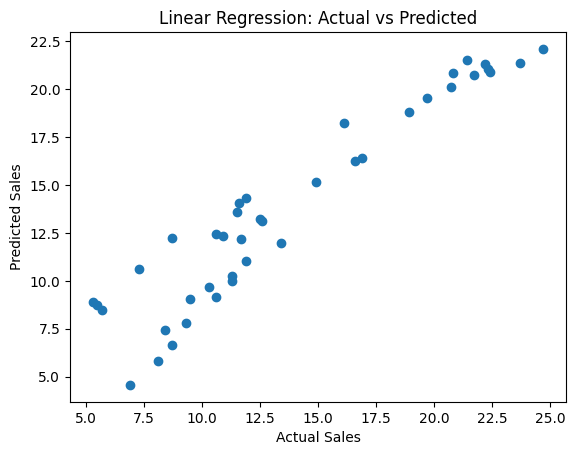

In [29]:
plt.figure()
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


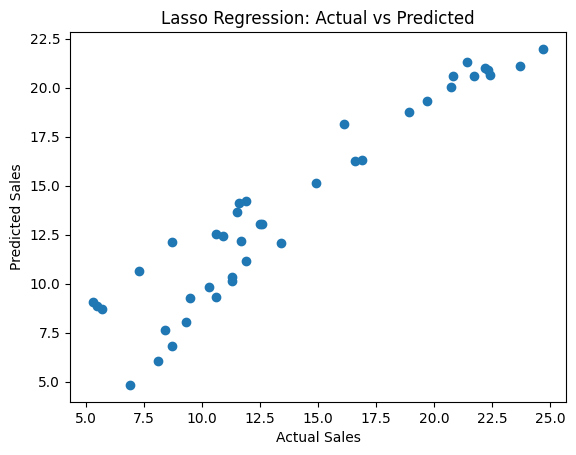

In [30]:
plt.figure()
plt.scatter(y_test, y_pred_lasso)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Lasso Regression: Actual vs Predicted")
plt.show()


**SUBTASK-04**

L1 Regularization -Lasso: Implementing Lasso Regression using libraries and
comparing results with Linear Regression.

Kaggle Dataset Link: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction?

Tasks:
1. Load dataset and select numeric features like: enginesize, horsepower,
curbweight, citympg.
Target: price
2. Train Linear Regression and Lasso Regression.
3. Compare coefficients and check which model gives stable results.
4. Evaluate using:
RMSE, R² score
5. Conclude how Ridge helps in multicollinearity.


In [ ]:
# Load dataset
data = pd.read_csv("CarPrice_Assignment.csv")   # change path if needed

# Select required features
features = ["enginesize", "horsepower", "curbweight", "citympg"]
target = "price"

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lr = lin_reg.predict(X_test_scaled)
lasso = Lasso(alpha=0.5)  # You can tune alpha
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)


In [ ]:
# Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Lasso Regression
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Linear Regression:")
print("RMSE:", rmse_lr)
print("R2 Score:", r2_lr)

print("\nLasso Regression:")
print("RMSE:", rmse_lasso)
print("R2 Score:", r2_lasso)
coef_comparison = pd.DataFrame({
    "Feature": features,
    "Linear Regression Coef": lin_reg.coef_,
    "Lasso Coef": lasso.coef_
})

print(coef_comparison)


Linear Regression:
RMSE: 3814.8141321939183
R2 Score: 0.8156566298368467

Lasso Regression:
RMSE: 3814.8302558912105
R2 Score: 0.8156550715418018
      Feature  Linear Regression Coef   Lasso Coef
0  enginesize             3243.638791  3243.450446
1  horsepower             1958.678660  1958.537770
2  curbweight             2008.768846  2008.663500
3     citympg             -294.519774  -294.334785


**SUBTASK-05**

L1 Regularization -Lasso: Implementing Lasso Regression using libraries and
comparing results with Linear Regression.
Kaggle Dataset Link:
https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

Tasks:

1. Load dataset and select features:
Engine Size, Cylinders, Fuel Consumption
Target: CO2 Emissions
2. Apply StandardScaler.
3. Train Linear Regression and Lasso Regression.
4. Use Ridge with multiple alpha values and find best alpha using:
GridSearchCV
5. Report best model performance and compare with Linear Regression.


In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("CO2 Emissions_Canada.csv")  # change path if needed

# Select required features
features = ["Engine Size(L)", "Cylinders", "Fuel Consumption Comb (L/100 km)"]
target = "CO2 Emissions(g/km)"

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lr = lin_reg.predict(X_test_scaled)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)


In [11]:
ridge = Ridge()

param_grid = {"alpha": [0.01, 0.1, 1, 10, 50, 100]}

grid = GridSearchCV(ridge, param_grid, cv=5, scoring="r2")
grid.fit(X_train_scaled, y_train)

best_ridge = grid.best_estimator_
print("Best Alpha:", grid.best_params_)

y_pred_ridge = best_ridge.predict(X_test_scaled)


def evaluate_model(name, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name}")
    print("RMSE:", rmse)
    print("R2 Score:", r2)
    print("-------------------")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)
evaluate_model("Best Ridge Regression", y_test, y_pred_ridge)


Best Alpha: {'alpha': 10}
Linear Regression
RMSE: 20.540748085335153
R2 Score: 0.8773348735033225
-------------------
Lasso Regression
RMSE: 20.54241157861251
R2 Score: 0.8773150046187961
-------------------
Best Ridge Regression
RMSE: 20.541396384652405
R2 Score: 0.8773271303605337
-------------------


In [12]:
coef_comparison = pd.DataFrame({
    "Feature": features,
    "Linear Regression": lin_reg.coef_,
    "Lasso": lasso.coef_,
    "Ridge": best_ridge.coef_
})

print(coef_comparison)


                            Feature  Linear Regression      Lasso      Ridge
0                    Engine Size(L)           7.605027   7.605462   7.746834
1                         Cylinders          11.702725  11.648532  11.676620
2  Fuel Consumption Comb (L/100 km)          38.330321  38.272358  38.170300
